Copyright **`(c)`** 2022 Giovanni Squillero `<squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

In [1]:
NUM_CE=3
NUM_DS=3
BIKE_DIM=2
USE_ONLY_MAX_SEATS=False

In [2]:
from gx_utils import *

In [3]:
from itertools import product, combinations
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

In [4]:
assert NUM_CE<=NUM_DS, "Initial state not valid, Evening is doomed"
assert BIKE_DIM!=0,"No seats on the bike"
assert not(USE_ONLY_MAX_SEATS==True and (NUM_CE+NUM_DS)<BIKE_DIM),"Not enough people to completly fill the bike, the problem won't be solvable"

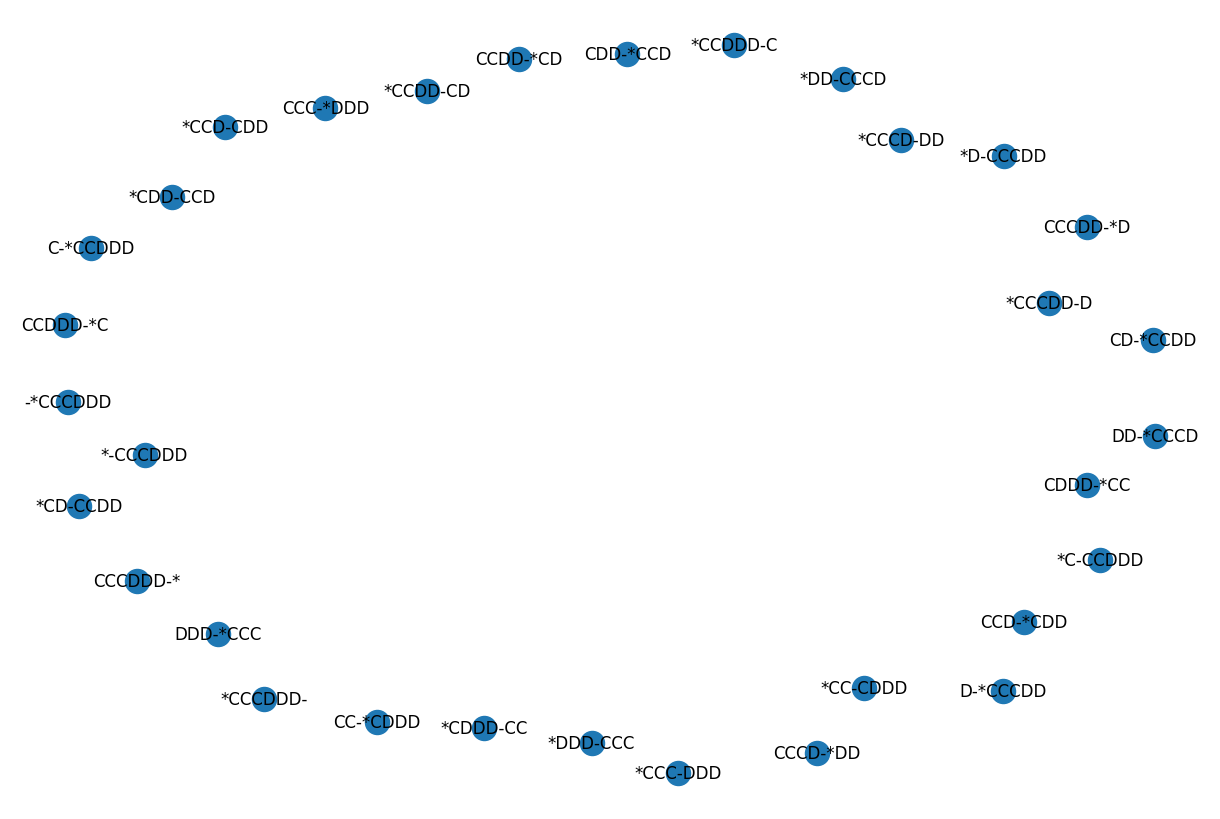

In [5]:
def node2sets(node):
    pizzeria, pub = node.split("-")
    return Multiset(pizzeria), Multiset(pub)


def sets2node(pizzeria, pub):
    return "".join(pizzeria) + "-" + "".join(pub)

sspace = nx.Graph()
for c, d, b in product(range(NUM_CE+1), range(NUM_DS+1), [True, False]):
    pizzeria = ("*" if b else "") + "C" * c + "D" * d
    pub = ("*" if not b else "") + "C" * (NUM_CE - c) + "D" * (NUM_DS - d)
    sspace.add_node(pizzeria + "-" + pub)
SOURCE = "*" + "C" * (NUM_CE) + "D" * (NUM_DS) + "-"
DESTINATION = "-*" + "C" * (NUM_CE) + "D" * (NUM_DS)

plt.figure(figsize=(12, 8))
nx.draw(sspace, with_labels=True)



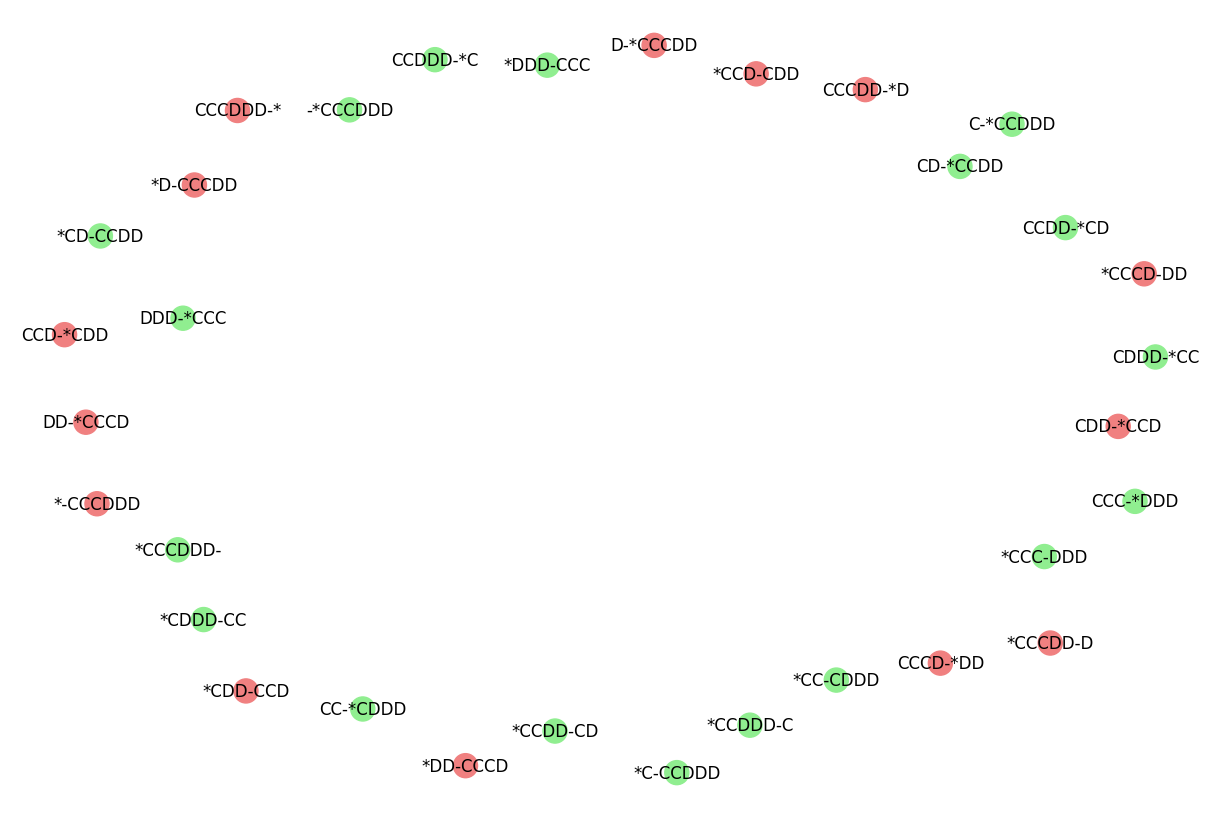

In [6]:
def valid_node(node):
    pizzeria, pub = node2sets(node)
    return valid_location(pizzeria) and valid_location(pub)


def valid_location(loc):
    if loc.count("*") == 1 and len(loc) == 1:
        return False
    if 0 < loc.count("D") < loc.count("C"):
        return False
    return True


plt.figure(figsize=(12, 8))
nx.draw(
    sspace,
    with_labels=True,
    node_color=["lightgreen" if valid_node(n) else "lightcoral" for n in sspace],
)

C:\Users\darda\AppData\Local\Temp\ipykernel_13860\3331137043.py:42: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  nx.draw(valid_sspace, pos=graphviz_layout(valid_sspace, prog="neato"), with_labels=True, node_color=node_color)


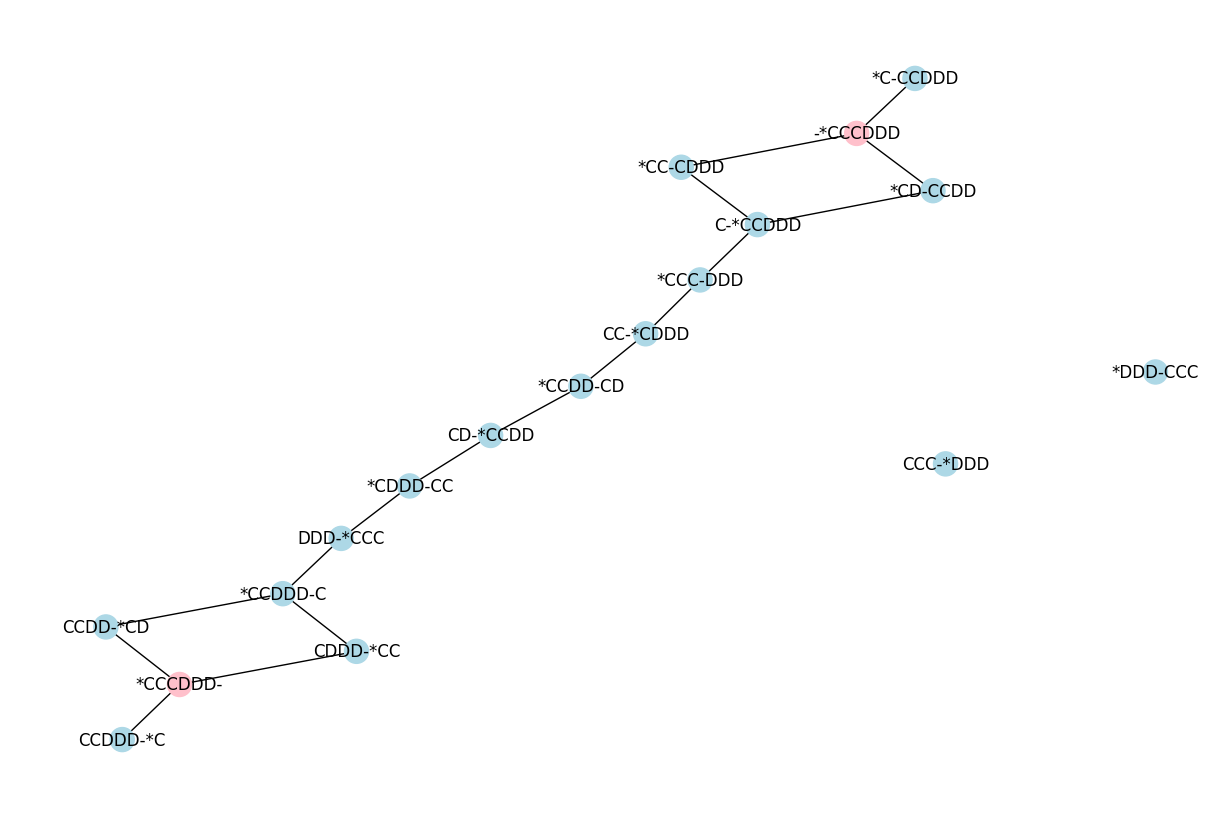

In [7]:
def bike_seats():
    b=[]
    for c, d,in product(range(NUM_CE+1), range(NUM_DS+1)):
        s="*"+"C"*c + "D"*d
        if USE_ONLY_MAX_SEATS==False:
            if len(s)<=BIKE_DIM+1 and s!="*":
                if s.count("C")>=1 and s.count("D")>=1:
                    if s.count("C")<=s.count("D"):
                        b.append(s)
                else:
                    b.append(s)
        else:
            if len(s)==BIKE_DIM+1 and s!="*":
                if s.count("C")>=1 and s.count("D")>=1:
                    if s.count("C")<=s.count("D"):
                        b.append(s)
                else:
                    b.append(s)
    return b  

acceptable_bike_conf=bike_seats()

def bike(from_, to):
    possible = list()
    for b in acceptable_bike_conf:
        bike = Multiset(b)
        if bike <= from_:
            possible.append(sets2node(from_ - bike, to + bike))
    return possible

valid_sspace = nx.Graph()

for node in sspace.nodes:
    if valid_node(node):
        valid_sspace.add_node(node)

for n1, n2 in [(a, b) for a in valid_sspace.nodes for b in bike(*node2sets(a)) if valid_node(b)]:
    valid_sspace.add_edge(n1, n2)

plt.figure(figsize=(12, 8))
node_color = ["pink" if n == SOURCE or n == DESTINATION else "lightblue" for n in valid_sspace]
nx.draw(valid_sspace, pos=graphviz_layout(valid_sspace, prog="neato"), with_labels=True, node_color=node_color)

In [8]:
try:
    print(nx.shortest_path(valid_sspace, SOURCE, DESTINATION))
except:
    print("No solution found!")


['*CCCDDD-', 'CCDD-*CD', '*CCDDD-C', 'DDD-*CCC', '*CDDD-CC', 'CD-*CCDD', '*CCDD-CD', 'CC-*CDDD', '*CCC-DDD', 'C-*CCDDD', '*CD-CCDD', '-*CCCDDD']
